In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\khint\OneDrive - belgiumcampus.ac.za\Documents\LaLiga Prediction\data\LaLiga_Matches.csv')

In [5]:
# Step 1: Prepare Season-Level Team Statistics
team_stats = []

for season, season_df in df.groupby("Season"):
    season_teams = {}
    for _, row in season_df.iterrows():
        home, away = row['HomeTeam'], row['AwayTeam']
        fthg, ftag, ftr = row['FTHG'], row['FTAG'], row['FTR']

        for team in [home, away]:
            if team not in season_teams:
                season_teams[team] = {
                    'Season': season, 'Team': team,
                    'Points': 0, 'GoalsScored': 0, 'GoalsConceded': 0,
                    'HomeWins': 0, 'AwayWins': 0
                }

        season_teams[home]['GoalsScored'] += fthg
        season_teams[home]['GoalsConceded'] += ftag
        season_teams[away]['GoalsScored'] += ftag
        season_teams[away]['GoalsConceded'] += fthg

        if ftr == 'H':
            season_teams[home]['Points'] += 3
            season_teams[home]['HomeWins'] += 1
        elif ftr == 'A':
            season_teams[away]['Points'] += 3
            season_teams[away]['AwayWins'] += 1
        else:
            season_teams[home]['Points'] += 1
            season_teams[away]['Points'] += 1

    team_stats.extend(season_teams.values())

stats_df = pd.DataFrame(team_stats)


In [6]:
# Top 4 teams per season
top4 = stats_df.sort_values(['Season', 'Points'], ascending=[True, False])
top4 = top4.groupby('Season').head(4)

In [7]:
# Most home wins
home_wins = stats_df.groupby('Team')['HomeWins'].sum().sort_values(ascending=False).head(10)

# Most away wins
away_wins = stats_df.groupby('Team')['AwayWins'].sum().sort_values(ascending=False).head(10)


In [8]:
# Most goals scored
goals_scored = stats_df.groupby('Team')['GoalsScored'].sum().sort_values(ascending=False).head(10)

# Most goals conceded
goals_conceded = stats_df.groupby('Team')['GoalsConceded'].sum().sort_values(ascending=False).head(10)

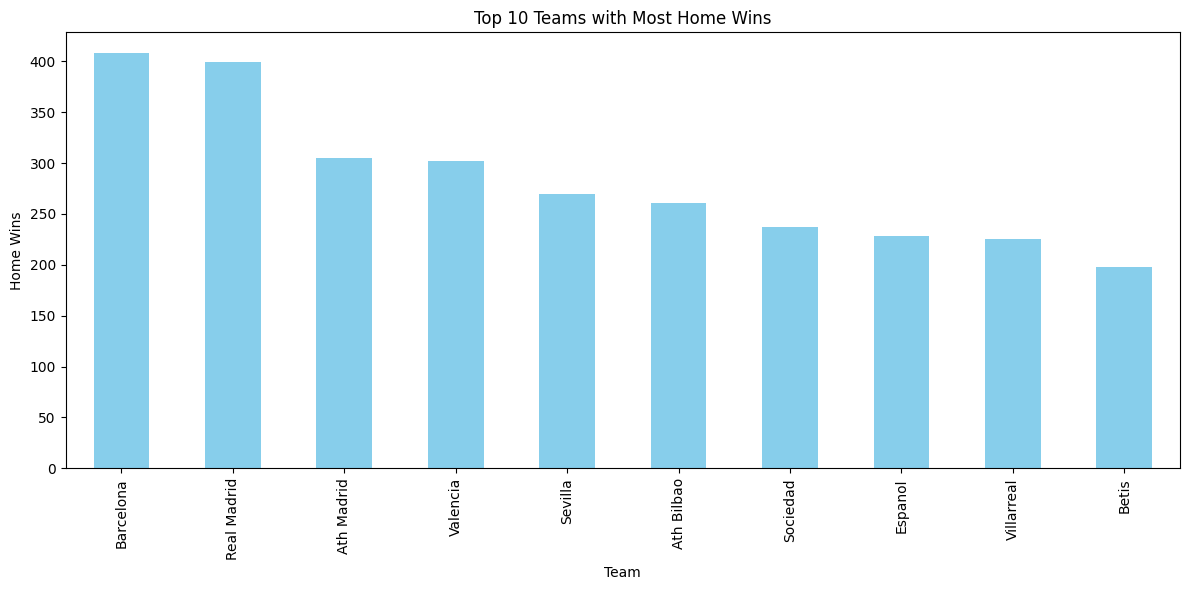

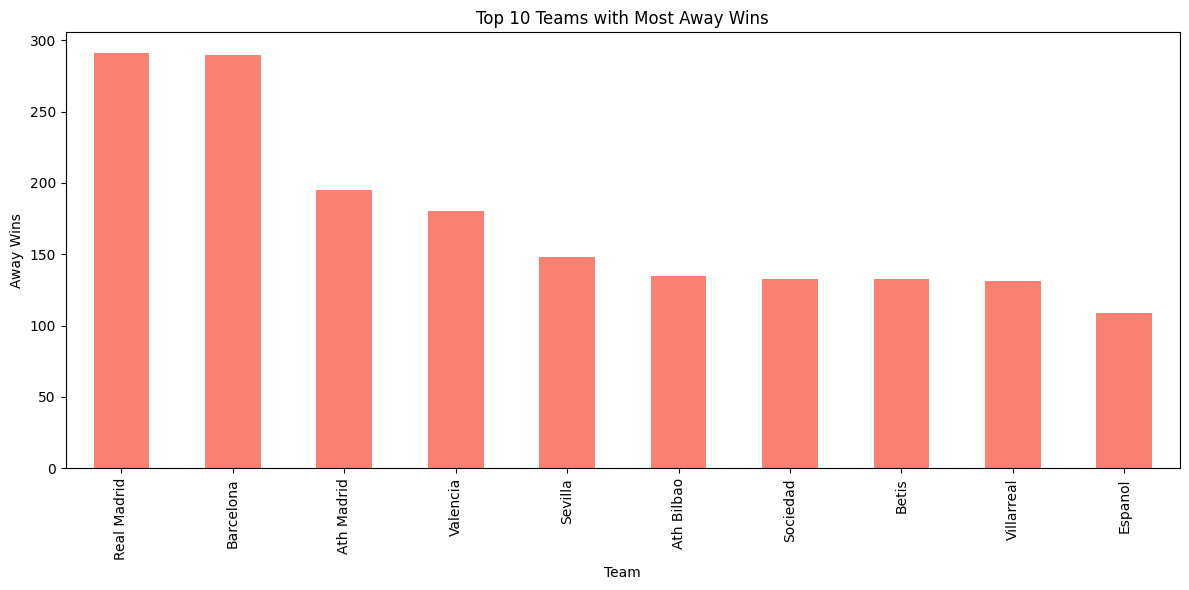

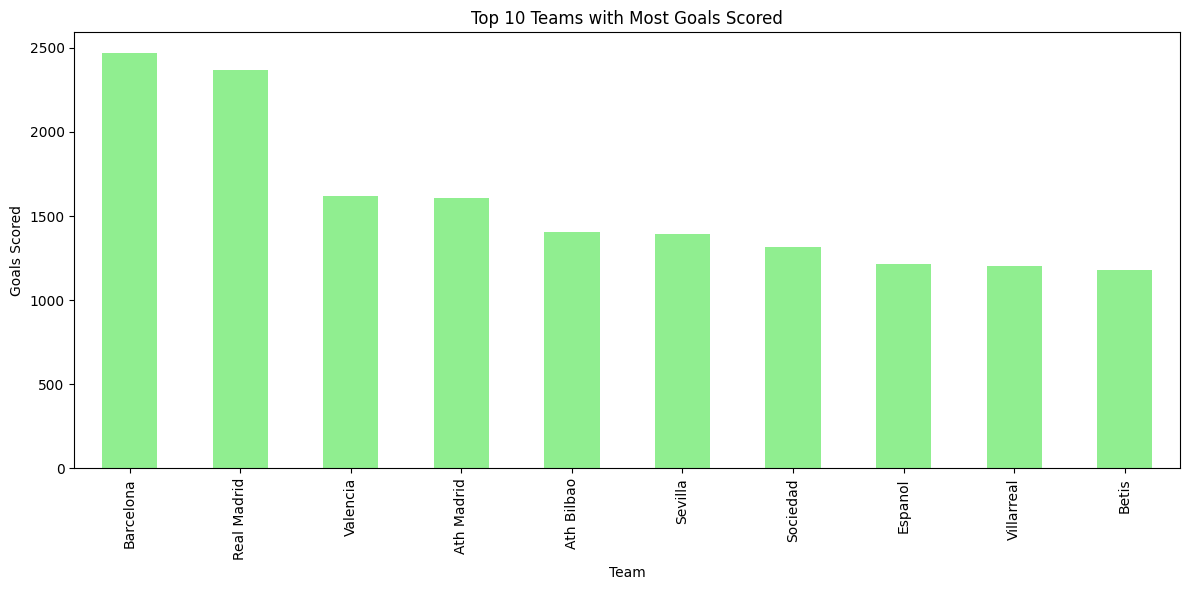

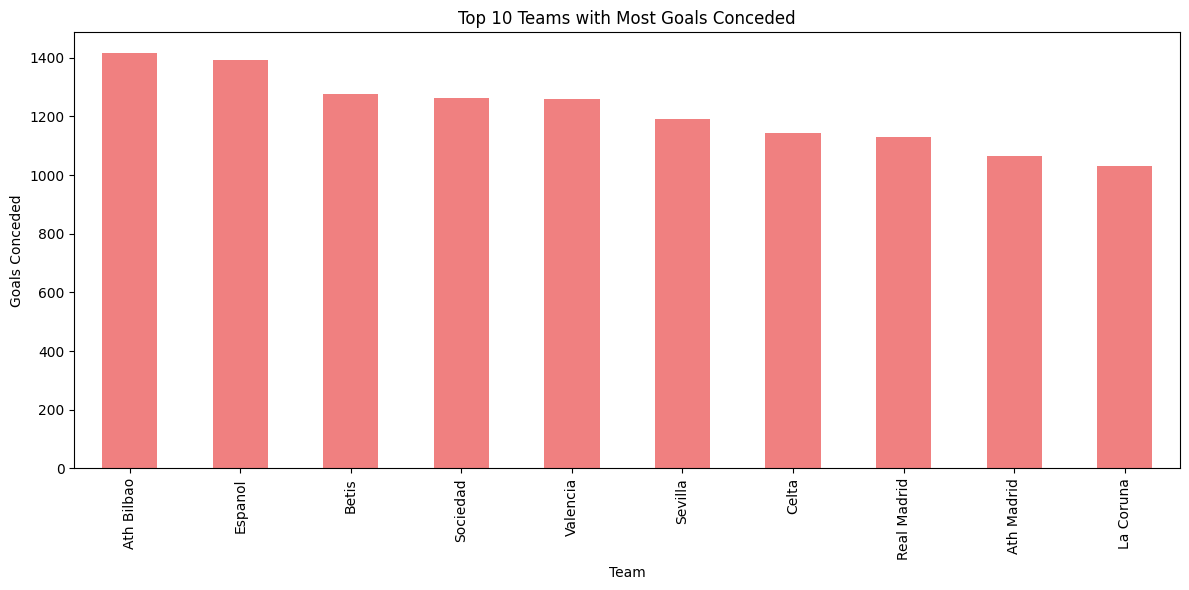

In [9]:
# Plotting
plt.figure(figsize=(12, 6))
home_wins.plot(kind='bar', title='Top 10 Teams with Most Home Wins', color='skyblue')
plt.ylabel('Home Wins')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
away_wins.plot(kind='bar', title='Top 10 Teams with Most Away Wins', color='salmon')
plt.ylabel('Away Wins')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
goals_scored.plot(kind='bar', title='Top 10 Teams with Most Goals Scored', color='lightgreen')
plt.ylabel('Goals Scored')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
goals_conceded.plot(kind='bar', title='Top 10 Teams with Most Goals Conceded', color='lightcoral')
plt.ylabel('Goals Conceded')
plt.tight_layout()
plt.show()
